In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import warnings as w
import Thermobar as pt

In [2]:
out_train=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Train_Thermobar_Format')
out_train_input=out_train['my_input']
Cpx_train=out_train['Cpxs']
Liq_train=out_train['Liqs']
Cpx_train_noID_noT=Cpx_train.drop(['Sample_ID_Cpx'], axis=1)
Liq_train_noID_noT=Liq_train.drop(['Sample_ID_Liq', 'Fe3Fet_Liq', 'NiO_Liq', 'CoO_Liq', 'CO2_Liq'], axis=1)
Cpx_Liq_Combo_train=pd.concat([Cpx_train_noID_noT, Liq_train_noID_noT], axis=1)
x_train=Cpx_Liq_Combo_train.values
y_train_T=out_train_input['T_K']
y_train_P=out_train_input['P_GPa']*10

In [3]:
## Test dataset
out_test=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')
out_test_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']
Cpx_test_noID_noT=Cpx_test.drop(['Sample_ID_Cpx'], axis=1)
Liq_test_noID_noT=Liq_test.drop(['Sample_ID_Liq', 'Fe3Fet_Liq', 'NiO_Liq', 'CoO_Liq', 'CO2_Liq'], axis=1)
Cpx_Liq_Combo_test=pd.concat([Cpx_test_noID_noT, Liq_test_noID_noT], axis=1)
x_test=Cpx_Liq_Combo_test.values
y_test_T=out_test_input['T_K']
y_test_P=out_test_input['P_GPa']*10

In [4]:
# Scaling
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Define the regressor, in our case the Extra Tree Regressor
regr_T = ExtraTreesRegressor(n_estimators=550, criterion='mse',
                             max_features=22, random_state=280) # random_state fixed for reproducibility

# Define the regressor, in our case the Extra Tree Regressor
regr_P = ExtraTreesRegressor(n_estimators=350, criterion='mse', 
                             max_features=22, random_state=80) # random_state fixed for reproducibility

# Train the model
regr_T.fit(x_train_scaled, y_train_T.ravel())
regr_P.fit(x_train_scaled, y_train_P.ravel())

C:\Users\penny\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


ExtraTreesRegressor(criterion='mse', max_features=22, n_estimators=350,
                    random_state=80)

In [5]:
x_test_scaled=scaler.transform(x_test)

## Predicting the test data for temp

'RMSE= 51.71416'

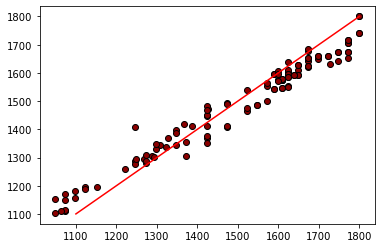

In [6]:
predicted_T=regr_T.predict(x_test_scaled)
plt.plot( y_test_T, predicted_T, 'ok', mfc='darkred')
plt.plot([1100, 1800], [1100, 1800], '-r')
Stats_T=pt.calculate_R2_np(y_test_T.values, predicted_T)
Stats_T['R2']
Stats_T['RMSE']

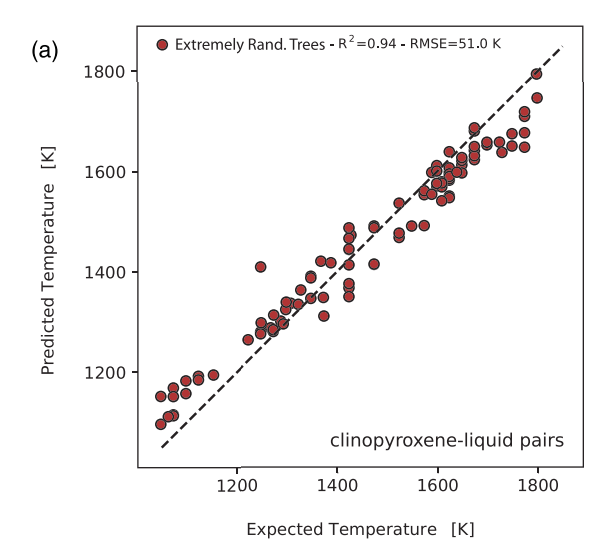

## Predicting the test data for Press

'RMSE= 2.99769'

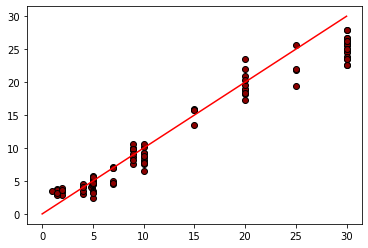

In [7]:
predicted_P=regr_P.predict(x_test_scaled)
plt.plot( y_test_P, predicted_P, 'ok', mfc='darkred')
plt.plot([0, 30], [0, 30], '-r')
Stats_P=pt.calculate_R2_np(y_test_P.values, predicted_P)
Stats_P['R2']
Stats_P['RMSE']

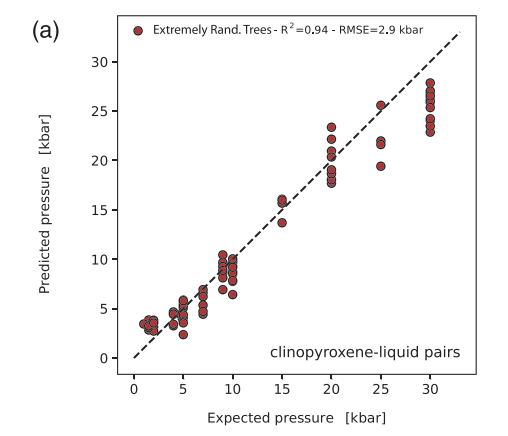

In [8]:
from pickle import dump
dump(scaler, open('scaler_Petrelli2020_Cpx_Liq.pkl', 'wb'))

import joblib
joblib.dump(regr_P, 'ETR_Press_Petrelli2020_Cpx_Liq')

joblib.dump(regr_T, 'ETR_Temp_Petrelli2020_Cpx_Liq')

['ETR_Temp_Petrelli2020_Cpx_Liq']

In [12]:

P_func=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                                  equationT="T_Petrelli2020_Cpx_Liq")
plt.plot(predicted_P, P_func, 'ok')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 63: character maps to <undefined>

## Predicting from Thermobar

In [12]:

P_func=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                                  equationP="P_Petrelli2020_Cpx_Liq")
plt.plot(predicted_P, P_func, 'ok')

ValueError: P_Petrelli2021_Cpx_Liq is not a valid equation

In [13]:
T_func=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, equationT="T_Petrelli2021_Cpx_Liq")
plt.plot(predicted_T, T_func, 'ok')

ValueError: T_Petrelli2021_Cpx_Liq is not a valid equation

In [12]:
PT_func=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_test,  liq_comps=Liq_test,
                                         equationT="T_Petrelli2021_Cpx_Liq",
                                        equationP="P_Petrelli2021_Cpx_Liq")


Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


In [13]:
P_func=pt.calculate_cpx_liq_press(
            cpx_comps=Cpx_test,  liq_comps=Liq_test, equationP="P_Petrelli2021_Cpx_Liq", T="Solve")
T_func=pt.calculate_cpx_liq_temp(
            cpx_comps=Cpx_test,  liq_comps=Liq_test, equationT="T_Petrelli2021_Cpx_Liq", P="Solve")
from functools import partial
if isinstance(P_func, partial) and isinstance(T_func, partial):
    print('yes')

Youve selected a T-independent function
Youve selected a T-independent function
Youve selected a P-independent function
